# Linear Regression in Python - Exercise

![Namespace Labs](../../../labs.png)

In [29]:
# Import pandas
# Import seaborn
# Import matplotlib
# Set the default seaborn style
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# Import the housing dataset
df = pd.read_csv('housing.csv')

In [3]:
# Check the head of the dataset
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - percent lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [4]:
# Check the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
# Display a summary of the dataset
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


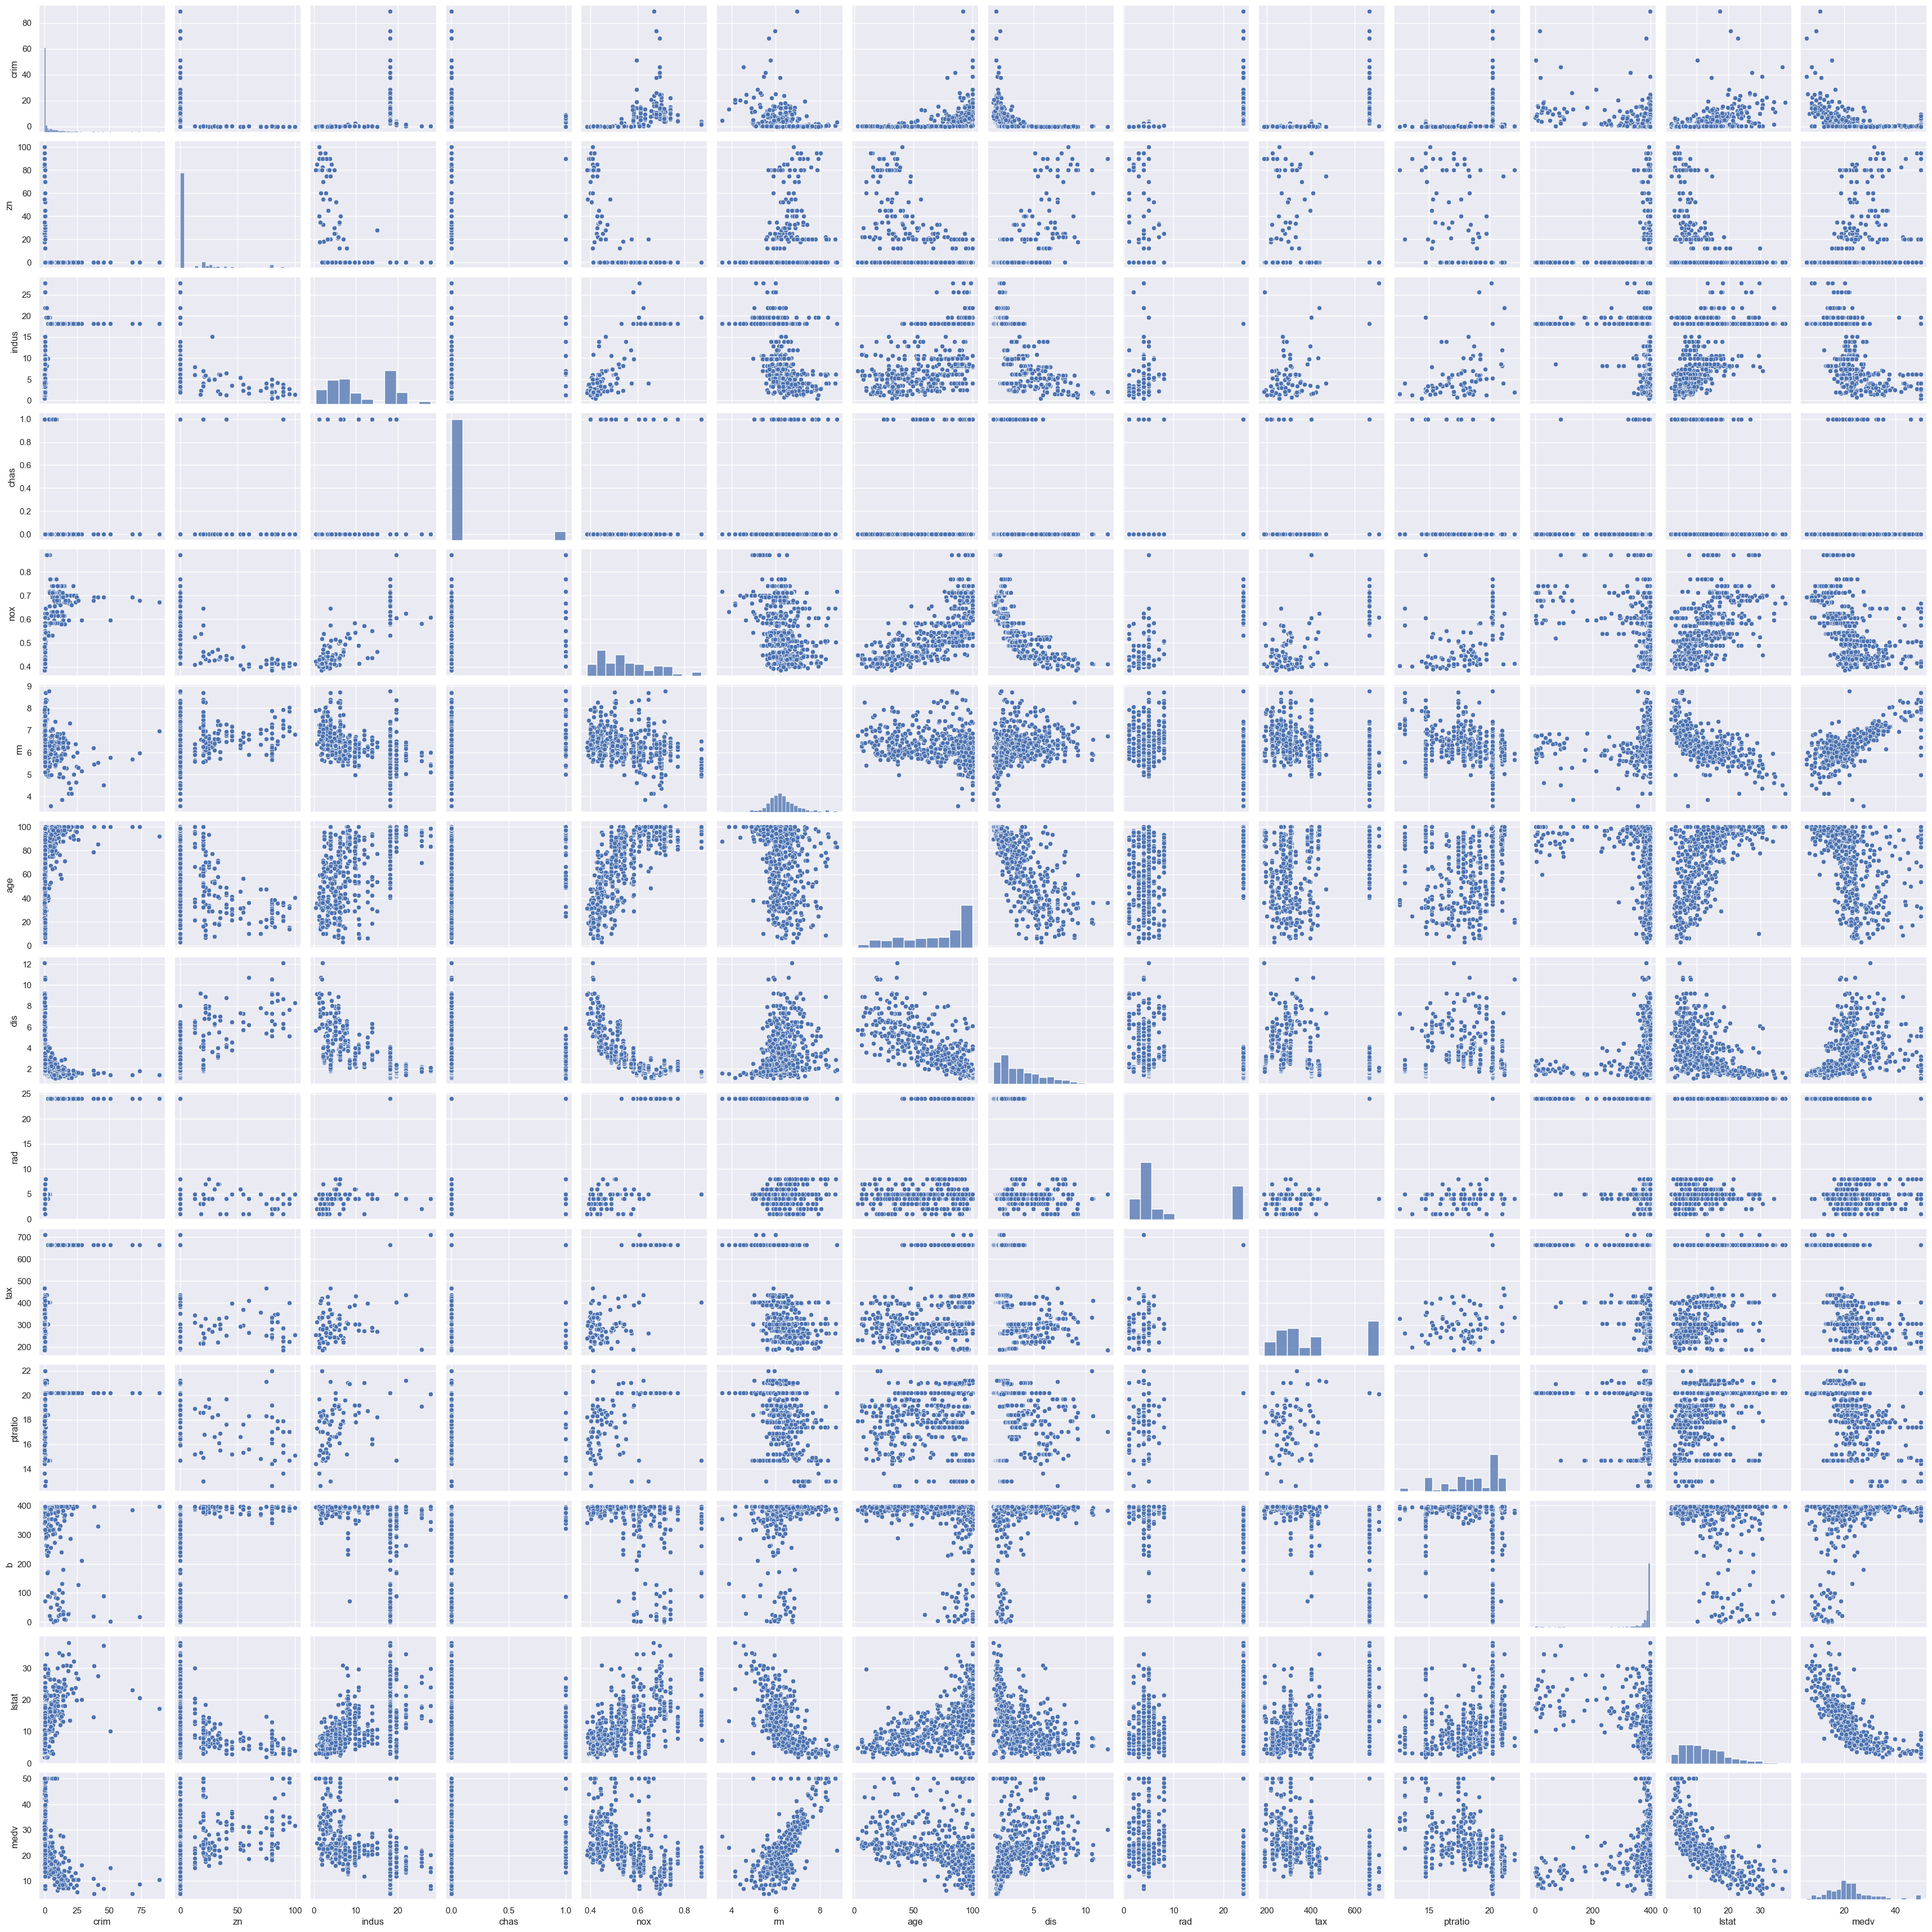

In [6]:
# Display the plot below
sns.pairplot(df)

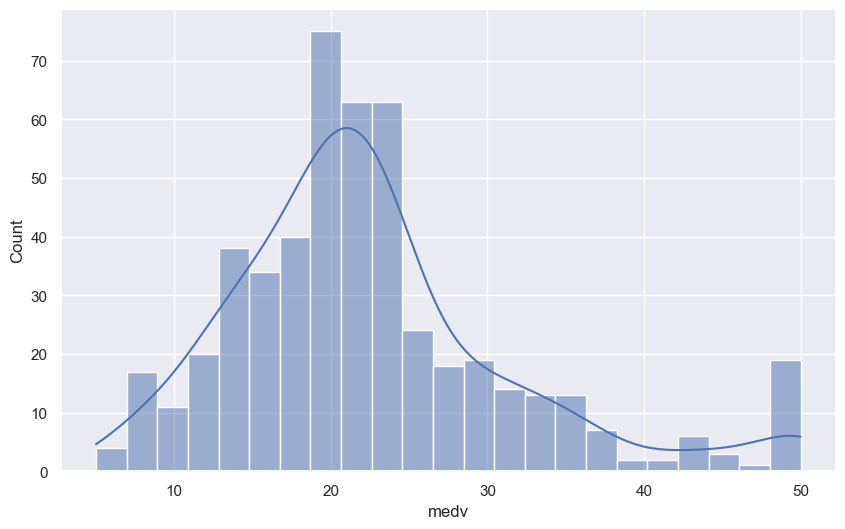

In [32]:
# Plot the distribution of the medv
plt.figure(figsize=(10,6))
sns.histplot(df.medv, kde=True);


In [35]:
# Create a dataframe containing correlation of the columns
corr = df.corr()

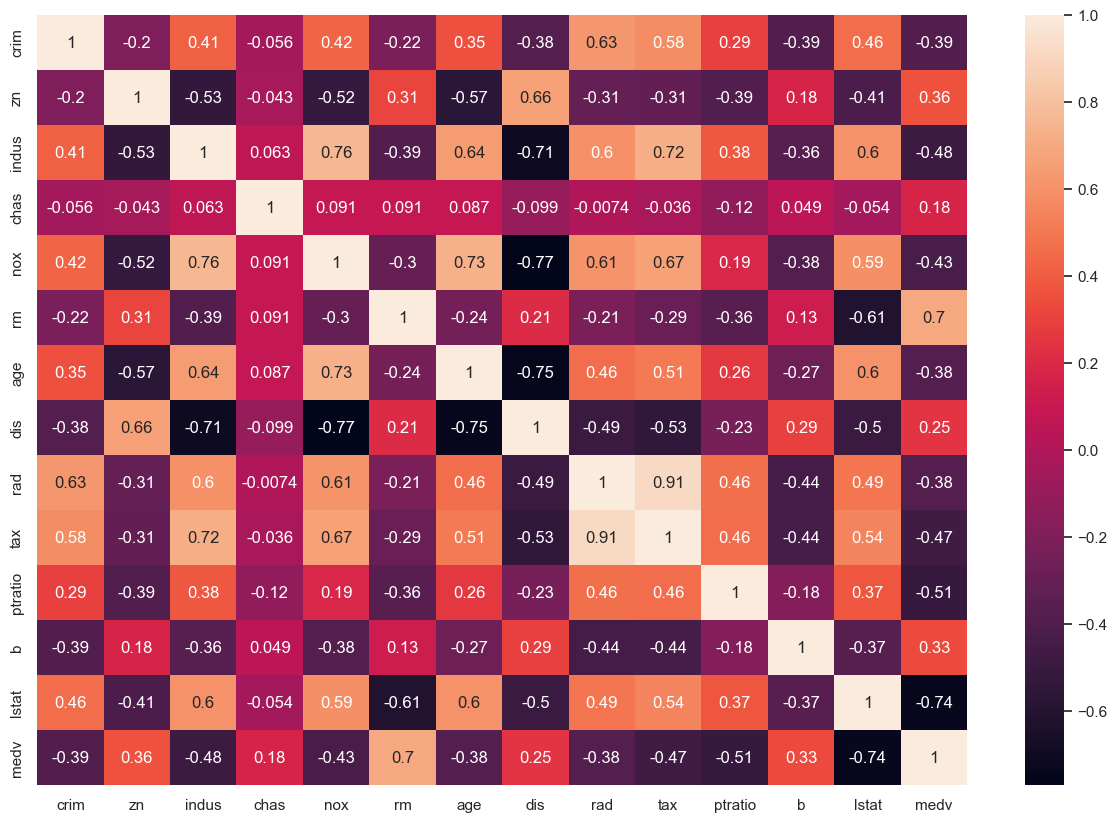

In [39]:
# Plot the correlation in a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True);

In [40]:
# Import train_test_split
from sklearn.model_selection import train_test_split

In [41]:
# Create the X variable
X = df.drop(['medv'], axis=1)

In [42]:
# Display the head of X
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [43]:
# Create the y variable
y = df.medv

In [44]:
# Display the y variable
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [45]:
# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

In [47]:
# Create an instance of LinearRegression
model = LinearRegression()

In [49]:
# Fit the instantiated model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [50]:
# Make predictions using the test data
predictions = model.predict(X_test)

In [86]:
# Save these predictions in a dataframe
df_predictions = pd.DataFrame(predictions, columns=['Predicted medv'])
df_predictions

,Predicted medv
0,28.534695
1,36.618701
2,15.637511
3,25.501450
4,18.709673
...,...
162,21.057443
163,25.017346
164,27.654619
165,20.702058


In [87]:
# CHeck the head of the predictions dataframe
df_predictions.head()

,Predicted medv
0,28.534695
1,36.618701
2,15.637511
3,25.501450
4,18.709673


In [88]:
# Print a summary of the predictions
df_predictions.describe()

,Predicted medv
count,167.000000
mean,21.441396
std,7.960020
min,-6.520797
25%,16.829332
50%,21.222723
75%,25.460883
max,42.480572


In [89]:
# Print a summary of medv from the original dataframe
df.medv.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

<Figure size 1000x600 with 0 Axes>

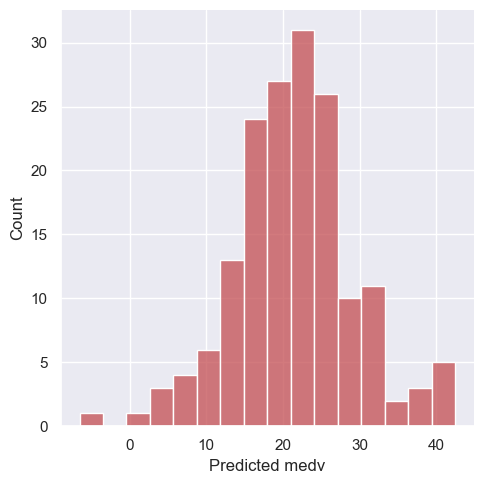

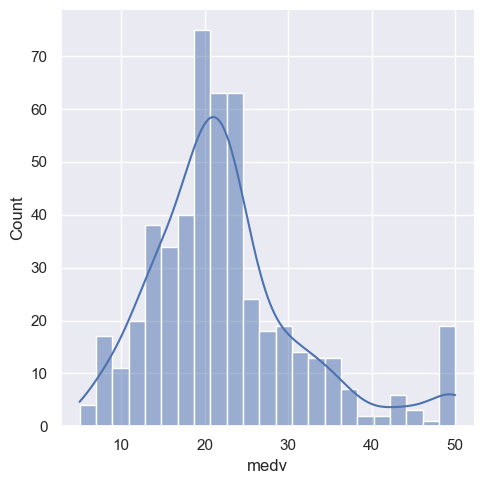

In [91]:
# Plot the distribution of medv and the predicted medv
plt.figure(figsize=(10, 6))
sns.displot(df_predictions['Predicted medv'], color='r')
sns.displot(df.medv, kde=True)

<Figure size 1200x800 with 0 Axes>

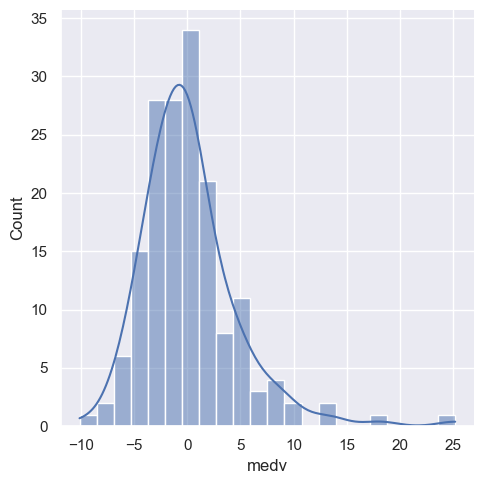

In [69]:
# Plot a graph showing the distribution of
# the difference between the predicted and the
# actual values
plt.figure(figsize=(12,8))
sns.displot((y_test - predictions), kde=True);

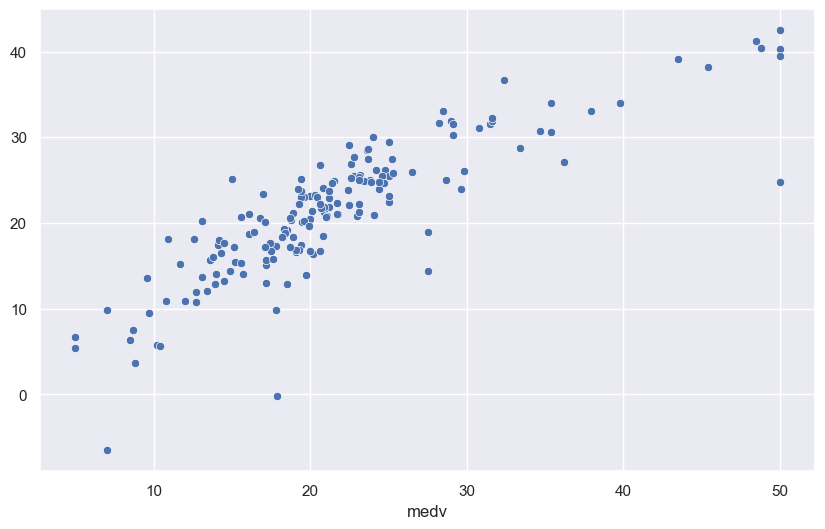

In [70]:
# Plot a scatterplot showing the distribution of
# the  the predicted and the
# actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x = y_test,  y = predictions);

In [72]:
# Import metrics
# Import numpy
from sklearn import metrics
import numpy as np

In [73]:
# Print the Mean Absolute Error
print("Mean Absolute Error is: {}".format(metrics.mean_absolute_error(y_test, predictions)))

Mean Absolute Error is: 3.148255754816827


In [74]:
# Print the Mean Squared Error

print("Mean Squared Error is: {}".format(metrics.mean_squared_error(y_test, predictions)))

Mean Squared Error is: 20.72402343733974


In [75]:
# Print the Root Mean Squared Error

print("Root Mean Squared Error: {}".format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

Root Mean Squared Error: 4.55236459846306


In [76]:
# Print the intercept of the model
model.intercept_

33.33497575563574

In [77]:
# Create a variable containing the coefficients
# Display the coefficients
coefficients = model.coef_

In [81]:
X.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [84]:
# Create a datafrae containing the coefficients
df_coef = pd.DataFrame([coefficients], columns=X.columns)

In [85]:
# Displayt the dataframe
df_coef

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.12875,0.037823,0.058211,3.238668,-16.169812,3.902051,-0.012851,-1.422224,0.234854,-0.008213,-0.928722,0.01177,-0.547566


# What is your interpretation of the coefficients
- Given all the coefficients constant, when the **crim** is increase by 1 the  **medv**  decrease by -0.12875

Happy coding!